In [37]:
import pandas as pd
import numpy as np
import os
import requests
import re
from io import BytesIO
import json
import cv2
from datetime import datetime
from collections import Counter
import matplotlib.pyplot as plt
from util.util import *
import time
import signal
import sys
import logging

In [176]:

my_dict = {'ADCVD100': 'http://10.97.126.52/'
           ,'ADCVD200': 'http://10.97.126.163/'
           ,'ADCVD300': 'http://10.97.126.53/'
           ,'ADCVD600': 'http://10.97.126.124/'
           ,'ADCVD700': 'http://10.97.126.54/'
           ,'ADCVD800': 'http://10.97.126.67/'

           }


day = sys.argv[1]
EQP_ID = sys.argv[2]
EQP_ID = "ADCVD700"
day = '20250327'
todatstr = day

In [191]:
for EQP_ID in my_dict:
    IMG_PATH = r'\\'+EQP_ID[0:7]+'1\APC'
    pd_data = returnPathImgData(IMG_PATH+"/"+EQP_ID+"/"+todatstr)
    
    for p in list(pd_data.iloc[0:5]['imgFileName']):
        image = cv2.imread(p)
        for index, num in enumerate(nums):
        #cv2.imwrite()

['\\\\ADCVD101\\APC/ADCVD100/20250327/Cam1+Cam2_MergeResult_20250327001001984.jpg', '\\\\ADCVD101\\APC/ADCVD100/20250327/Cam1+Cam2_MergeResult_20250327004135821.jpg', '\\\\ADCVD101\\APC/ADCVD100/20250327/Cam1+Cam2_MergeResult_20250327012046133.jpg', '\\\\ADCVD101\\APC/ADCVD100/20250327/Cam1+Cam2_MergeResult_20250327012628984.jpg', '\\\\ADCVD101\\APC/ADCVD100/20250327/Cam1+Cam2_MergeResult_20250327013102007.jpg']
['\\\\ADCVD201\\APC/ADCVD200/20250327/Cam1+Cam2_MergeResult_20250327000152348.jpg', '\\\\ADCVD201\\APC/ADCVD200/20250327/Cam1+Cam2_MergeResult_20250327000629346.jpg', '\\\\ADCVD201\\APC/ADCVD200/20250327/Cam1+Cam2_MergeResult_20250327001352079.jpg', '\\\\ADCVD201\\APC/ADCVD200/20250327/Cam1+Cam2_MergeResult_20250327003147625.jpg', '\\\\ADCVD201\\APC/ADCVD200/20250327/Cam1+Cam2_MergeResult_20250327003558021.jpg']
['\\\\ADCVD301\\APC/ADCVD300/20250327/Cam1+Cam2_MergeResult_20250327000545246.jpg', '\\\\ADCVD301\\APC/ADCVD300/20250327/Cam1+Cam2_MergeResult_20250327004442224.jpg', '

In [177]:
def returnPathImgData(IMG_PATH):
    true_filedirlist =[]
    eqp_id=[]
    ShiftDate=[]
    filekey=[]
    if os.path.exists(IMG_PATH):
        filesdetails = os.listdir (IMG_PATH)
        for finame in filesdetails:
            if 'jpg' in finame:
                eqp_id.append(EQP_ID)
                filekey.append(finame)
                ShiftDate.append(datetime.strptime(todatstr, "%Y%m%d"))
                true_filedirlist.append(IMG_PATH+"/"+ finame)                       


                
                    
    data = {'filekey':filekey,
            'imgFileName':true_filedirlist}
    tft_chip_id = pd.DataFrame(data)
    return tft_chip_id

In [178]:
IMG_PATH = r'\\'+EQP_ID[0:7]+'1\APC'

In [179]:
IMG_PATH

'\\\\ADCVD701\\APC'

In [180]:
 pd_data = returnPathImgData(IMG_PATH+"/"+EQP_ID+"/"+todatstr)

In [181]:
pd_data

filekey  \
0    Cam1+Cam2_MergeResult_20250327000250186.jpg   
1    Cam1+Cam2_MergeResult_20250327002320307.jpg   
2    Cam1+Cam2_MergeResult_20250327003555390.jpg   
3    Cam1+Cam2_MergeResult_20250327004035952.jpg   
4    Cam1+Cam2_MergeResult_20250327004516184.jpg   
..                                           ...   
110  Cam1+Cam2_MergeResult_20250327163249521.jpg   
111  Cam1+Cam2_MergeResult_20250327163834154.jpg   
112  Cam1+Cam2_MergeResult_20250327164154911.jpg   
113  Cam1+Cam2_MergeResult_20250327164801701.jpg   
114  Cam1+Cam2_MergeResult_20250327165526756.jpg   

                                           imgFileName  
0    \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  
1    \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  
2    \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  
3    \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  
4    \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  
..                                                 ...  
110  \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  
111  \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  
112  \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  
113  \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  
114  \\ADCVD701\APC/ADCVD700/20250327/Cam1+Cam2_Mer...  

[115 rows x 2 columns]

In [182]:
red_center = (640, 480)

In [183]:

image = cv2.imread(pd_data.iloc[0]['imgFileName'])


# 获取图像的形状
height, width, _ = image.shape

# 确定左半边区域
left_half = image[0:height, 0:width // 2]

# 获取左半边的形状
left_height, left_width, _ = left_half.shape

# 确定左半边的中心点
center_x = left_width // 2
center_x1 = int(center_x * 0.9)
center_x2 = int(center_x * 1.15)
center_y = left_height // 2
center_y1 = int(center_y * 0.9)
center_y2 = int(center_y * 1.15)

# 定义每个象限的区域
top_left = left_half[0:center_y1, 0:center_x1]

top_right = left_half[0:center_y1, center_x2:left_width]
top_right = cv2.flip(top_right, 1)

bottom_left = left_half[center_y2:left_height, 0:center_x1]
bottom_left = cv2.flip(bottom_left, 0)

bottom_right = left_half[center_y2:left_height, center_x2:left_width]
bottom_right = cv2.flip(bottom_right, -1)


cv2.imshow('image', image)

# 显示切割结果
cv2.imshow('Top Left', top_left)
cv2.imshow('Top Right', top_right)
cv2.imshow('Bottom Left', bottom_left)
cv2.imshow('Bottom Right', bottom_right)

# 等待直到用户按下任意键
cv2.waitKey(0)
cv2.destroyAllWindows()

In [184]:
def findGlassEdge(nums):
    total_sum = 0  
    count = 0      
    edge_start = -1
    edge_end = -1
    edge = False
    for index, num in enumerate(nums):
        if num > 240:
            continue
        
        if not edge:
            total_sum += num
            count += 1      

        if count > 0:  # 确保我们有添加过数字
            average = total_sum / count  # 计算当前平均值

            # 如果当前数字小于平均值 20，则停止
            if num < average - 30:
                edge = True
                if edge_start == -1:
                    edge_start = index
            elif edge:
                edge_end = index
                break
    return edge_start, edge_end
    

In [185]:
def meas_target(nums, start_idx, end_idx):
    
    # 计算 start_idx - 10 到 start_idx - 3 的平均值
    
    sub_list = nums[start_idx - 10:start_idx - 3]
    average = sum(sub_list) / len(sub_list)  # 计算平均值
    
    
    consecutive_count = 0 
    
    # 从 end_idx 开始向后查找
    for index in range(end_idx, len(nums)):
        if nums[index] < (average - 30):
            consecutive_count += 1  # 满足条件的点数加 1
            if consecutive_count == 5:
                return index # 返回第一个满足条件的点的起始索引
        else:
            consecutive_count = 0  # 如果不满足条件，重置计数器
    return -1

In [186]:
def drawline(image):
    y_position = 320  # 替换为你要分析的行
    image_with_line = image.copy()
    cv2.line(image_with_line, (0, y_position), (image.shape[1], y_position), (255, 0, 0), 2)
    
    
    image = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
    #image = cv2.GaussianBlur(image, (5,5), 1)
    
    # 提取该行的灰度值
    row_values = image[y_position, :]
    
    
    # 计算窗口大小为 3 的移动平均数
    #window_size = 3
    #kernel = np.ones(window_size) / window_size
    #row_values = np.convolve(row_values, kernel, mode='same')
    
    edge_start, edge_end = findGlassEdge(row_values)
    target_end = meas_target(row_values, edge_start, edge_end)
    
    print(edge_start, edge_end)
    print(target_end)
    
    cv2.line(image_with_line, (edge_end, y_position), (image.shape[1], y_position), (255, 255, 0), 2)
    
    cv2.line(image_with_line, (edge_end, y_position), (target_end, y_position), (0, 255, 255), 2)
    
    
    
    # 创建一个并排的子图
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # 绘制折线图
    ax1.set_title(f"Pixel Intensity Values of Row at Y = {y_position}")
    ax1.set_xlabel("Pixel Position")
    ax1.set_ylabel("Intensity Value")
    ax1.plot(row_values, color='blue', marker='o', markersize=2, linestyle='-')  # 使用折线图
    ax1.grid()
    ax1.set_xlim([0, image.shape[1]])  # 设置 x 轴范围
    ax1.set_ylim([0, 256])  # 设置 y 轴范围
    ax1.axhline(y=255, color='r', linestyle='--')  # 绘制水平线标记最大灰度值

    # 在右侧显示图像
    ax2.set_title("Image with Marked Row")
    ax2.imshow(image_with_line)
    ax2.axis('off')  # 不显示坐标轴

    # 调整布局
    plt.tight_layout()
    plt.show()

    # 显示带有红色线条的图像
    #cv2.imshow('Image with Marked Row', image_with_line)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

205 210
223


172 177
248


202 208
225


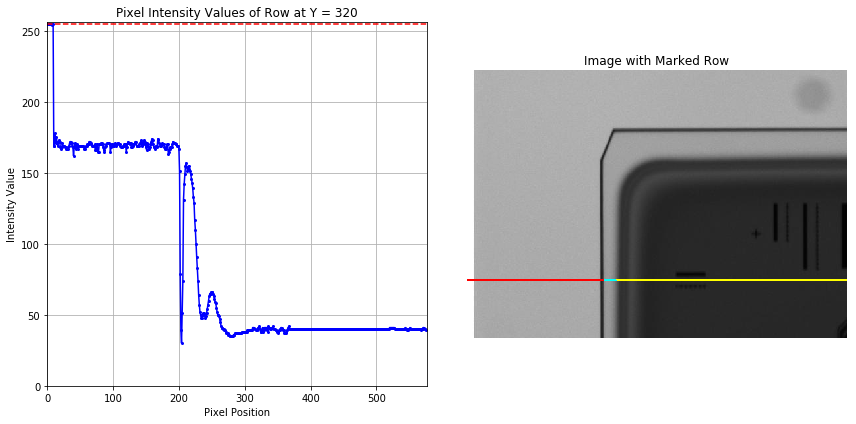

167 171
240


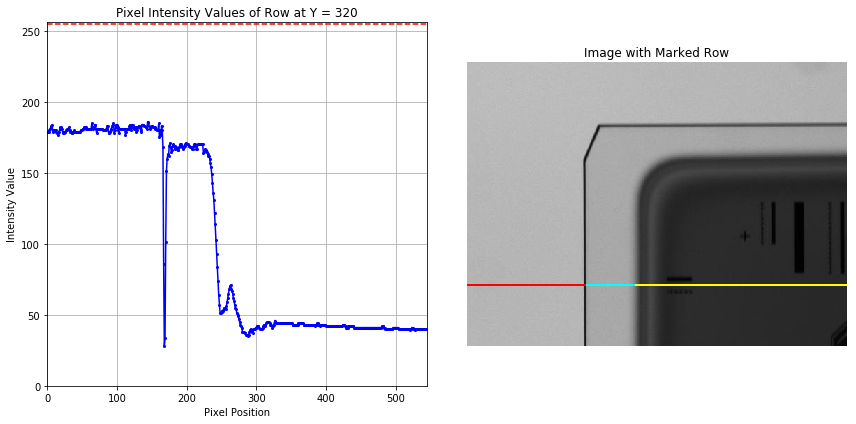

In [187]:
drawline(top_left.copy())
drawline(top_right.copy())
drawline(bottom_left.copy())
drawline(bottom_right.copy())


In [23]:
pd_data

filekey  \
0   Cam1+Cam2_MergeResult_20250327001001984.jpg   
1   Cam1+Cam2_MergeResult_20250327004135821.jpg   
2   Cam1+Cam2_MergeResult_20250327012046133.jpg   
3   Cam1+Cam2_MergeResult_20250327012628984.jpg   
4   Cam1+Cam2_MergeResult_20250327013102007.jpg   
5   Cam1+Cam2_MergeResult_20250327023045897.jpg   
6   Cam1+Cam2_MergeResult_20250327023835491.jpg   
7   Cam1+Cam2_MergeResult_20250327025416722.jpg   
8   Cam1+Cam2_MergeResult_20250327030418658.jpg   
9   Cam1+Cam2_MergeResult_20250327031200120.jpg   
10  Cam1+Cam2_MergeResult_20250327034756425.jpg   
11  Cam1+Cam2_MergeResult_20250327043644101.jpg   
12  Cam1+Cam2_MergeResult_20250327044918145.jpg   
13  Cam1+Cam2_MergeResult_20250327045209371.jpg   
14  Cam1+Cam2_MergeResult_20250327053237766.jpg   
15  Cam1+Cam2_MergeResult_20250327054858319.jpg   
16  Cam1+Cam2_MergeResult_20250327055648185.jpg   
17  Cam1+Cam2_MergeResult_20250327060048943.jpg   
18  Cam1+Cam2_MergeResult_20250327060910499.jpg   
19  Cam1+Cam2_MergeResult_20250327061424758.jpg   
20  Cam1+Cam2_MergeResult_20250327062205878.jpg   
21  Cam1+Cam2_MergeResult_20250327062653486.jpg   
22  Cam1+Cam2_MergeResult_20250327064745098.jpg   
23  Cam1+Cam2_MergeResult_20250327072412642.jpg   
24  Cam1+Cam2_MergeResult_20250327074825351.jpg   
25  Cam1+Cam2_MergeResult_20250327075350438.jpg   
26  Cam1+Cam2_MergeResult_20250327075825421.jpg   
27  Cam1+Cam2_MergeResult_20250327081216633.jpg   
28  Cam1+Cam2_MergeResult_20250327081727043.jpg   
29  Cam1+Cam2_MergeResult_20250327100038705.jpg   
30  Cam1+Cam2_MergeResult_20250327100410152.jpg   
31  Cam1+Cam2_MergeResult_20250327105936248.jpg   
32  Cam1+Cam2_MergeResult_20250327110307218.jpg   
33  Cam1+Cam2_MergeResult_20250327111224795.jpg   
34  Cam1+Cam2_MergeResult_20250327114717354.jpg   
35  Cam1+Cam2_MergeResult_20250327115421109.jpg   
36  Cam1+Cam2_MergeResult_20250327125023914.jpg   
37  Cam1+Cam2_MergeResult_20250327131320350.jpg   
38  Cam1+Cam2_MergeResult_20250327132438069.jpg   
39  Cam1+Cam2_MergeResult_20250327133600596.jpg   
40  Cam1+Cam2_MergeResult_20250327134038715.jpg   
41  Cam1+Cam2_MergeResult_20250327135120270.jpg   
42  Cam1+Cam2_MergeResult_20250327135928217.jpg   
43  Cam1+Cam2_MergeResult_20250327150759348.jpg   

                                          imgFileName  
0   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
1   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
2   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
3   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
4   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
5   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
6   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
7   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
8   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
9   \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
10  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
11  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
12  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
13  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
14  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
15  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
16  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
17  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
18  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
19  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
20  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
21  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
22  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
23  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
24  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
25  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
26  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
27  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
28  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
29  \\ADCVD101\APC/ADCVD100/20250327/Cam1+Cam2_Mer...  
30  \\AD